## Introducción

En este notebook, se realiza un Análisis Exploratorio de Datos (EDA) del dataset proporcionado por el Observatorio de Movilidad y Seguridad Vial (OMSV). El objetivo es generar información que permita a las autoridades locales tomar medidas para disminuir la cantidad de víctimas fatales en siniestros viales.

## 1- Importar las librerías y cargar los datos

Los datos se cargan desde un archivo Excel que contiene dos hojas: "hechos" y "víctimas". Cada hoja se cargará en un DataFrame separado.

## 2- Vista general de los datos

Mostramos las primeras filas de cada DataFrame y proporcionamos un resumen de las columnas y sus tipos de datos.

## 3: Valores faltantes y duplicados

Identificamos las columnas que contienen valores faltantes en ambos DataFrames. Y verificamos la presencia de registros duplicados en ambos DataFrames.

## 4- Valores atípicos (outliers)

Usamos boxplots para visualizar los valores atípicos en las columnas numéricas de cada DataFrame.

## Paso 6: Análisis de columnas específicas

### Distribución de hechos por año y mes

Visualizamos la distribución de los hechos ocurridos por año y por mes. Observamos que la mayoría de los hechos se concentran en ciertos años y meses específicos.

### Análisis de edad de las víctimas por sexo y rol

Analizamos la distribución de la edad de las víctimas en función del sexo y el rol. Observamos diferencias significativas en la distribución de edades entre los diferentes sexos y roles.

## Paso 7: Análisis de la diferencia entre fechas de hechos y fallecimiento

Calculamos y visualizamos la diferencia en días entre la fecha del hecho y la fecha de fallecimiento. La mayoría de las víctimas fallecen dentro de los primeros días después del siniestro.

## Conclusiones

En este EDA, hemos identificado varias tendencias y patrones importantes en los datos de siniestros viales y víctimas. Estos hallazgos pueden ayudar a informar decisiones y políticas para mejorar la seguridad vial en la Ciudad de Buenos Aires.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el conjunto de datos desde Excel
# Especifica la hoja que se desea cargar
hechos = pd.read_excel("homicidios.xlsx", sheet_name="HECHOS")
victimas = pd.read_excel("homicidios.xlsx", sheet_name="VICTIMAS")

In [26]:
hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [3]:
victimas  

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [4]:
victimas.info()   # Resumen de las columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [5]:
victimas.describe()  # Descripción estadística de las columnas numéricas

,FECHA,AAAA,MM,DD
count,717,717.000000,717.000000,717.000000
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000
std,NaN,1.672655,3.575140,8.683358


In [6]:
# Verificar valores nulos
print(victimas.isnull().sum())
# Reemplazar 'SD' por '01/01/2025' en la columna FECHA_FALLECIMIENTO
victimas['FECHA_FALLECIMIENTO'] = victimas['FECHA_FALLECIMIENTO'].replace('SD', '2025-01-01 00:00:00')

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64


In [7]:
victimas = victimas[victimas['EDAD'] != 'SD']  #elimino las 16 filas donde edad=SD para poder graficar

In [20]:
# Comprobar valores duplicados en cada DataFrame
print(f"Registros duplicados en Hechos: {hechos.duplicated().sum()}")
print(f"Registros duplicados en Víctimas: {victimas.duplicated().sum()}")

Registros duplicados en Hechos: 0
Registros duplicados en Víctimas: 0


C:\Users\ROXANA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ROXANA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\ROXANA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to

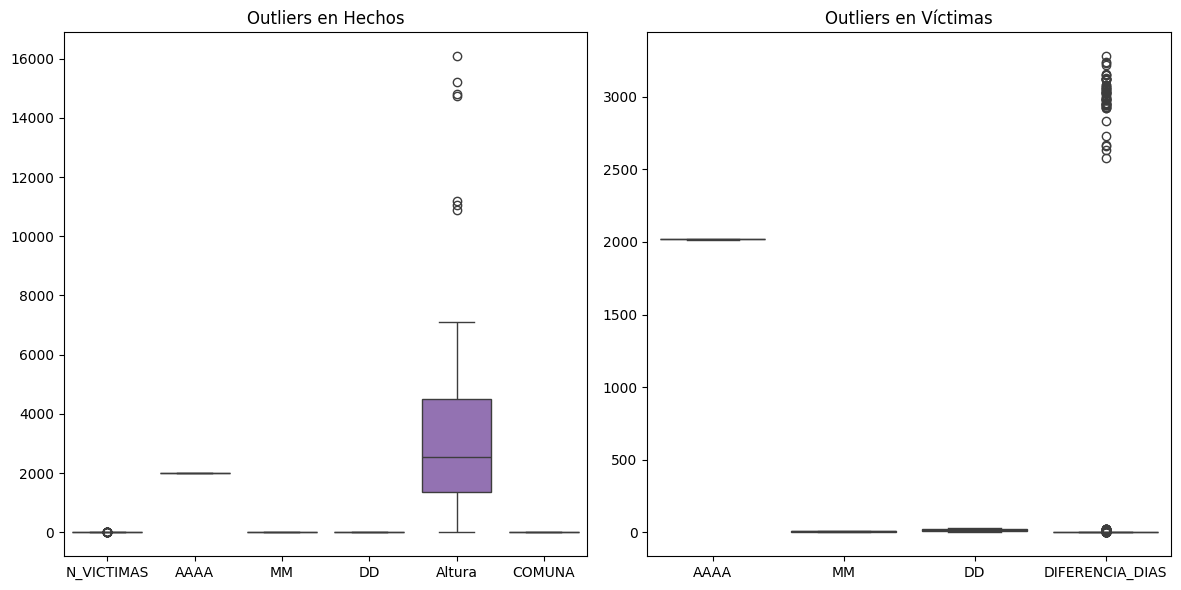

In [23]:
# Detectar outliers en columnas numéricas usando boxplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=hechos.select_dtypes(include=[np.number]))
plt.title('Outliers en Hechos')

plt.subplot(1, 2, 2)
sns.boxplot(data=victimas.select_dtypes(include=[np.number]))
plt.title('Outliers en Víctimas')

plt.tight_layout()
plt.show()

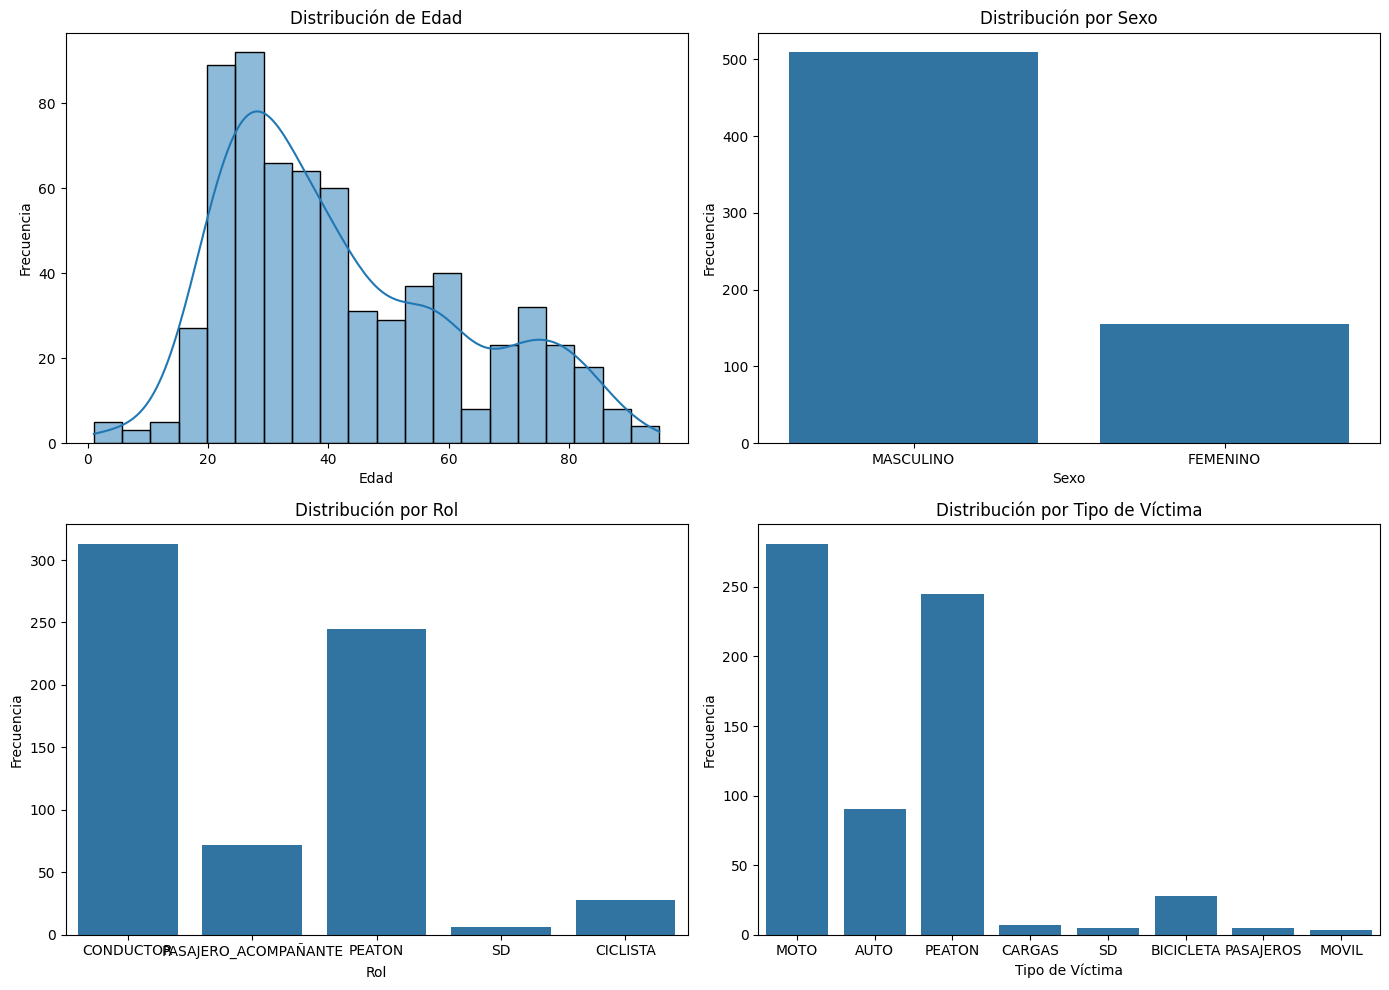

In [8]:
# Crear los gráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Distribución de Edad
sns.histplot(victimas['EDAD'].dropna(), bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Edad')
axes[0, 0].set_xlabel('Edad')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico 2: Distribución de Sexo
sns.countplot(data=victimas, x='SEXO', ax=axes[0, 1])
axes[0, 1].set_title('Distribución por Sexo')
axes[0, 1].set_xlabel('Sexo')
axes[0, 1].set_ylabel('Frecuencia')

# Gráfico 3: Distribución de Rol
sns.countplot(data=victimas, x='ROL', ax=axes[1, 0])
axes[1, 0].set_title('Distribución por Rol')
axes[1, 0].set_xlabel('Rol')
axes[1, 0].set_ylabel('Frecuencia')

# Gráfico 4: Distribución por Tipo de Víctima
sns.countplot(data=victimas, x='VICTIMA', ax=axes[1, 1])
axes[1, 1].set_title('Distribución por Tipo de Víctima')
axes[1, 1].set_xlabel('Tipo de Víctima')
axes[1, 1].set_ylabel('Frecuencia')

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

C:\Users\ROXANA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\ROXANA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


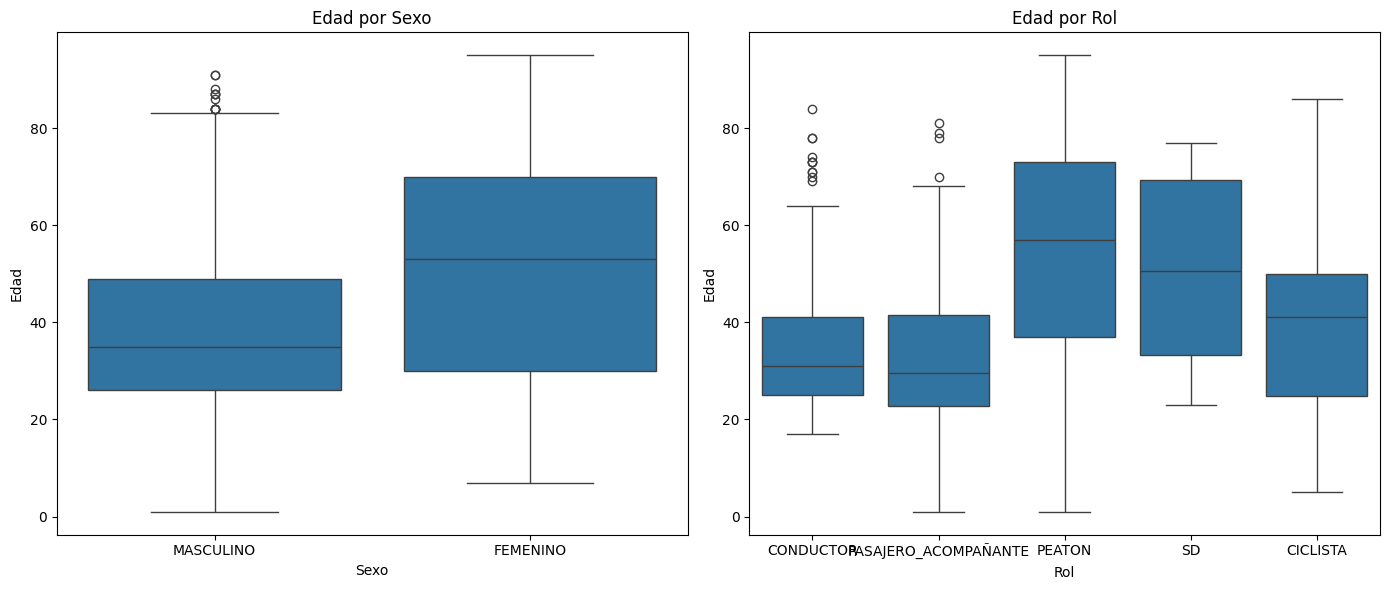

In [11]:
#Análisis Bivariado
# Crear una figura con dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
#Relación entre Edad y Sexo:
sns.boxplot(data=victimas, x='SEXO', y='EDAD', ax=axes[0])
axes[0].set_title('Edad por Sexo')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('Edad')  
#Relación entre Edad y Rol:
sns.boxplot(data=victimas, x='ROL', y='EDAD', ax=axes[1])
axes[1].set_title('Edad por Rol')
axes[1].set_xlabel('Rol')
axes[1].set_ylabel('Edad')
# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura completa con los dos gráficos
plt.show()

C:\Users\ROXANA\AppData\Local\Temp\ipykernel_3164\630405634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victimas['AAAA-MM'] = victimas['AAAA'].astype(str) + '-' + victimas['MM'].astype(str).str.zfill(2)


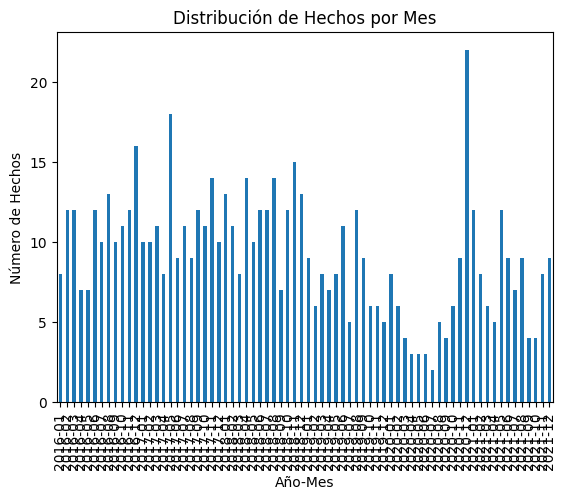

In [12]:
#Análisis Temporal
#Distribución de Hechos por Año y Mes:
victimas['AAAA-MM'] = victimas['AAAA'].astype(str) + '-' + victimas['MM'].astype(str).str.zfill(2)

hechos_por_mes = victimas['AAAA-MM'].value_counts().sort_index()
hechos_por_mes.plot(kind='bar')
plt.title('Distribución de Hechos por Mes')
plt.xlabel('Año-Mes')
plt.ylabel('Número de Hechos')
plt.xticks(rotation=90)
plt.show()

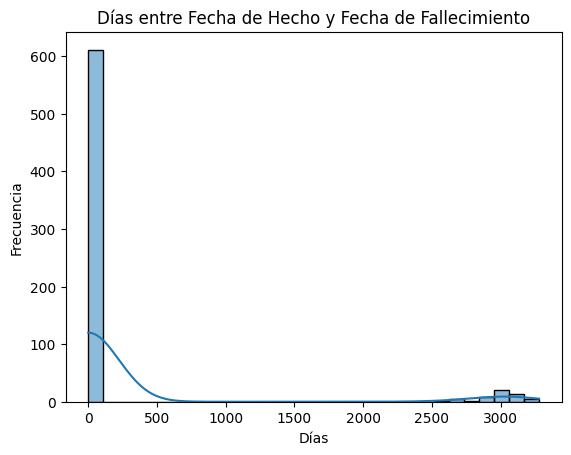

In [15]:
#Comparar Fechas de Hecho y Fallecimiento:
# Asegurarse de que las columnas de fecha sean del tipo datetime usando .loc para evitar el warning
victimas.loc[:, 'FECHA_FALLECIMIENTO'] = pd.to_datetime(victimas['FECHA_FALLECIMIENTO'])
victimas.loc[:, 'FECHA'] = pd.to_datetime(victimas['FECHA'])

# Calcular la diferencia en días directamente en el DataFrame victimas
victimas.loc[:, 'DIFERENCIA_DIAS'] = (victimas['FECHA_FALLECIMIENTO'] - victimas['FECHA']).dt.days

# Crear el histograma
sns.histplot(victimas['DIFERENCIA_DIAS'].dropna(), bins=30, kde=True)
plt.title('Días entre Fecha de Hecho y Fecha de Fallecimiento')
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.show()

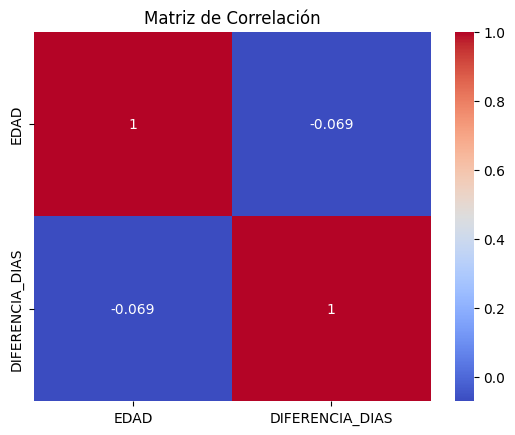

In [16]:
#Análisis de Correlación
#Correlación entre Variables Numéricas:
corr_matrix = victimas[['EDAD', 'DIFERENCIA_DIAS']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()